# Sentiment Analysis (MapReduce-Style)
This notebook is a **minimal template**. You will fill in the TODOs to:
1) Define keyword sets
2) Implement the `map_post` function (Map)
3) Group by label (Shuffle/Group)
4) Sum totals (Reduce)
5) Print counts **and** a final verdict (Happier / Sadder / Tied)

Use the provided dataset path or change it to your file.
Keep the logic **very simple** (exact keyword matches, case-insensitive).

## 0) Dataset Path (edit if needed)

In [1]:
DATA_PATH = '../data/sample_us_posts.txt'
print('Using dataset:', DATA_PATH)

Using dataset: ../data/sample_us_posts.txt


## 1) Keywords
Fill in positive and negative keyword sets.

In [2]:
SENTIMENT_DICT = {
    "positive": set(["happy", "excited", "thrilled", "love"]),
    "negative": set(["sad", "depressed", "angry", "upset"])
}
print('POS:', SENTIMENT_DICT["positive"],
    '\nNEG:', SENTIMENT_DICT["negative"])

POS: {'excited', 'thrilled', 'love', 'happy'} 
NEG: {'upset', 'sad', 'angry', 'depressed'}


## 2) Map
Implement a function that reads one line and returns a list with one pair: (label, 1)
Rules:
- Positive if contains ≥1 positive keyword and no negative
- Negative if contains ≥1 negative and no positive
- Mixed if contains both
- Neutral otherwise
- Use `line.lower()` and `split()` to get words for simplicity.

In [12]:
def map_post(line: str) -> list[tuple[str, int]]:
    import re
    pos_count = 0
    neg_count = 0
    
    # tokenizing words using regex
    line_lower = line.lower()
    for word in SENTIMENT_DICT["positive"]:
        pos_count += len(re.findall(rf'\b{re.escape(word)}\b', line_lower))
    for word in SENTIMENT_DICT["negative"]:
        neg_count += len(re.findall(rf'\b{re.escape(word)}\b', line_lower))

    # classify line
    if pos_count >= 1 and neg_count == 0:
        return [("Positive", 1)]
    elif neg_count >= 1 and pos_count == 0:
        return [("Negative", 2)]
    elif pos_count > 0 and neg_count > 0:
        return [("Mixed", 3)]
    else:
        return [("Neutral", 4)]


## 3) Driver: Map Over Lines
We iterate through the file and collect `(label, 1)` pairs.

In [13]:
mapped = []
with open(DATA_PATH, 'r', encoding='utf-8') as f:
    for line in f:
        if line.strip():
            pairs = map_post(line)
            mapped.extend(pairs)
print('First few mapped items:', mapped[:10])

First few mapped items: [('Positive', 1), ('Positive', 1), ('Negative', 2), ('Negative', 2), ('Positive', 1), ('Positive', 1), ('Neutral', 4), ('Mixed', 3), ('Positive', 1), ('Mixed', 3)]


## 4) Shuffle/Group
Group values by label into a dictionary, e.g., {'Positive':[1,1,...], 'Negative':[1,...]}.

In [14]:
groups = {}
# for (label, value) in mapped: add value to groups[label]
for label, value in mapped:
    if label not in groups:
        groups[label] = []
    groups[label].append(value)
print('Grouped:', groups)


Grouped: {'Positive': [1, 1, 1, 1, 1], 'Negative': [2, 2], 'Neutral': [4], 'Mixed': [3, 3]}


## 5) Reduce
Create totals by summing values for each label, e.g., {'Positive': 3, 'Negative': 2, ...}

In [20]:
totals = {}
for label, count in groups.items():
    totals[label] = sum(count)

## 6) Print Counts and Verdict
- Print totals for all labels
- Compute and print a **verdict**: Happier / Sadder / Tied
  based on Positive vs Negative counts.

In [ ]:
print('Totals:', totals)
if totals["positive"] > totals["negative"]:
    verdict = "Happier"
elif totals["negative"] > totals["positive"]:
    verdict = "Sadder"
else:
    verdict = "Tied"

print(f"Document Verdict: {verdict}")


## 7) Optional: Bar Chart
If you know matplotlib, you can draw a simple bar chart.

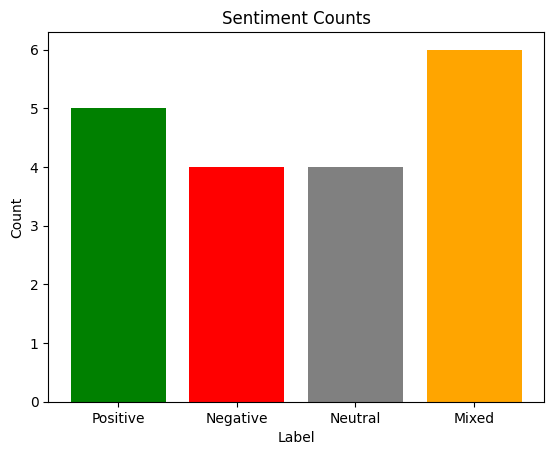

In [23]:
# Optional
try:
    import matplotlib.pyplot as plt
    labels = list(totals.keys())
    values = [totals[k] for k in labels]
    plt.figure()
    plt.bar(labels, values, color=["green", "red", "gray", "orange"])
    plt.title('Sentiment Counts')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()
except Exception as e:
    print('Chart skipped or totals not ready yet:', e)

---
### Checklist to Submit
- [X] Filled POS/NEG keywords
- [X] Implemented `map_post`
- [X] Grouped mapped output into `groups`
- [X] Reduced to `totals`
- [X] Printed totals and verdict
- [X] (Optional) Chart
